In [ ]:
!pip install librosa
!pip install essentia

In [6]:
audio_librosa = "2.mp3"

In [7]:
%matplotlib inline  
import librosa                     # librosa music package
import essentia                    # essentia music package
import essentia.standard           # essentia for imperative programming
import essentia.streaming          # essentia for declarative programming

import IPython                     # for playing audio
import numpy as np                 # for handling large arrays
import pandas as pd                # for data manipulation and analysis
import scipy                       # for common math functions
import sklearn                     # a machine learning library
import os                          # for accessing local files

import librosa.display             # librosa plot functions
import matplotlib.pyplot as plt    # plotting with Matlab functionality
import seaborn as sns              # data visualization based on matplotlib

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


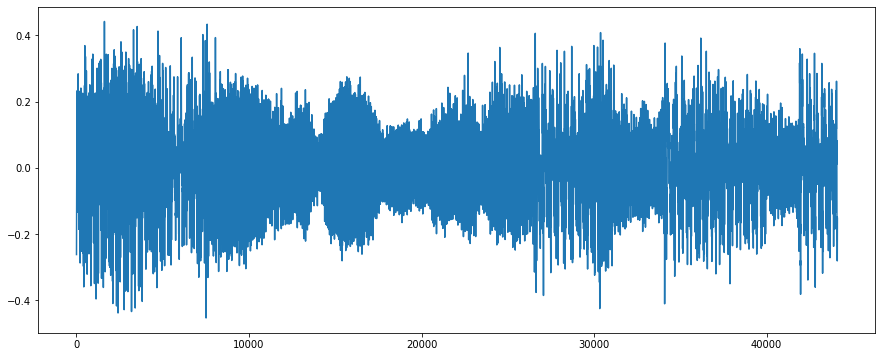

In [28]:
y, sr = librosa.core.load(audio_librosa)
# in Essentia
loader = essentia.standard.MonoLoader(filename='2.mp3')
audio_essentia = loader()
IPython.display.Audio('2.mp3')
plt.rcParams['figure.figsize'] = (15, 6)
plt.plot(y[1*44100:2*44100]) 
plt.show()


In [16]:
hop_length = 256
frame_length = 512
    
# compute sum of signal square by frame
energy = np.array([
    sum(abs(y[i:i+frame_length]**2))
    for i in range(0, len(y), hop_length)
])
energy.shape

# compute RMSE over frames
rmse = librosa.feature.rms(y, frame_length=frame_length, hop_length=hop_length, center=True)
rmse.shape
rmse = rmse[0]

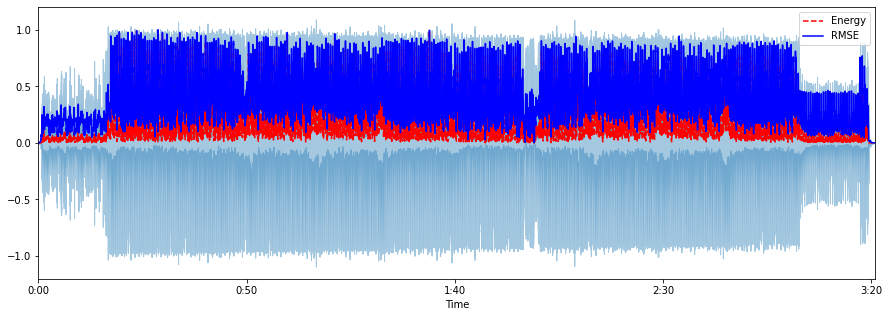

In [17]:
frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, energy/energy.max(), 'r--')                # normalized for visualization
plt.plot(t[:len(rmse)], rmse/rmse.max(), color='blue') # normalized for visualization
plt.legend(('Energy', 'RMSE'))

Text(0.5, 1.0, 'log(spectrogram)')

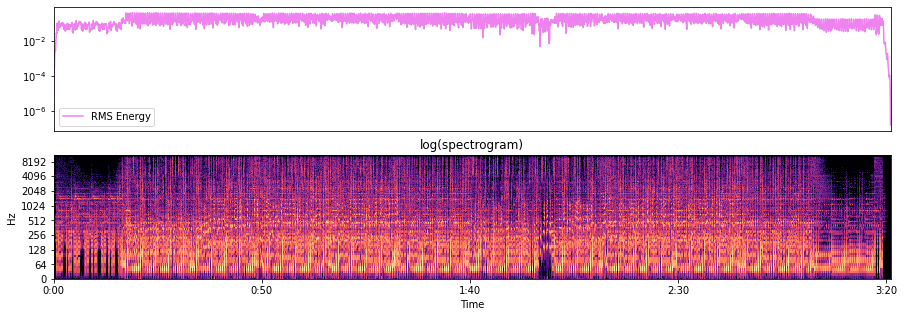

In [20]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.semilogy(rms.T, label='RMS Energy', color="violet")
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                            y_axis='log', x_axis='time')
plt.title('log(spectrogram)')

In [35]:
y_f=y[44100*10:44100*12]

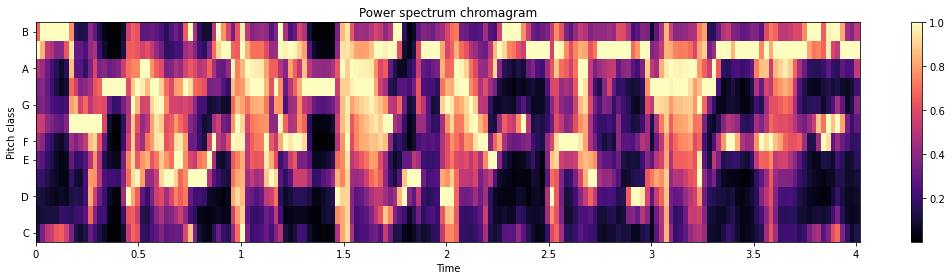

In [36]:
# using a power spectrum
chroma_d = librosa.feature.chroma_stft(y=y_f, sr=sr)

plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma_d, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Power spectrum chromagram')
plt.tight_layout()
plt.show()

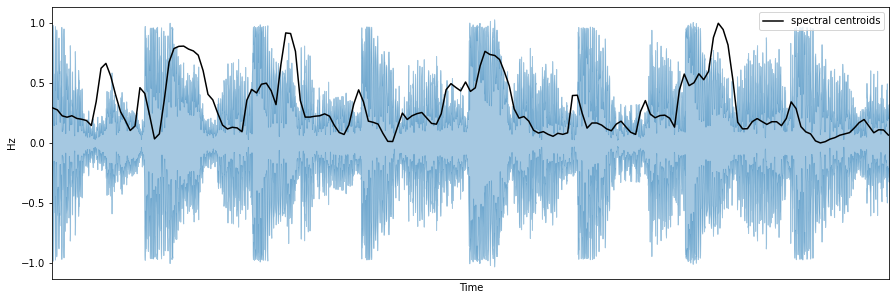

In [39]:
# compute the spectral centroid for each frame in a signal
spectral_centroids = librosa.feature.spectral_centroid(y=y_f, sr=sr)[0]
spectral_centroids.shape

# compute the time variable for visualization
frames = range(len(spectral_centroids))
f_times = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
librosa.display.waveplot(y_f, sr=sr, alpha=0.4)
plt.plot(f_times, normalize(spectral_centroids), color='black', label='spectral centroids')
plt.ylabel('Hz')
plt.xticks([])
plt.legend()

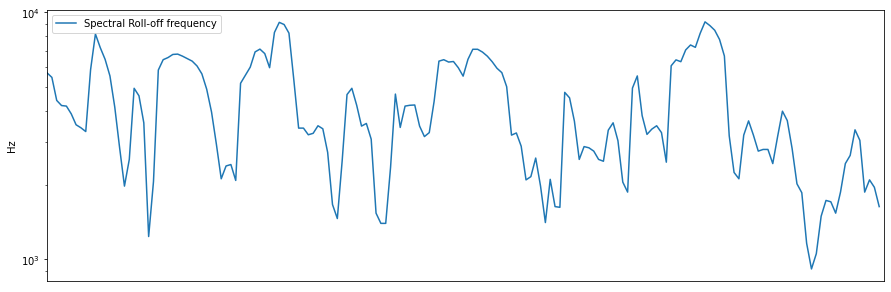

In [42]:
rolloff = librosa.feature.spectral_rolloff(y=y_f, sr=sr)

plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Spectral Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()    


Text(0.5, 1.0, 'MFCCs')

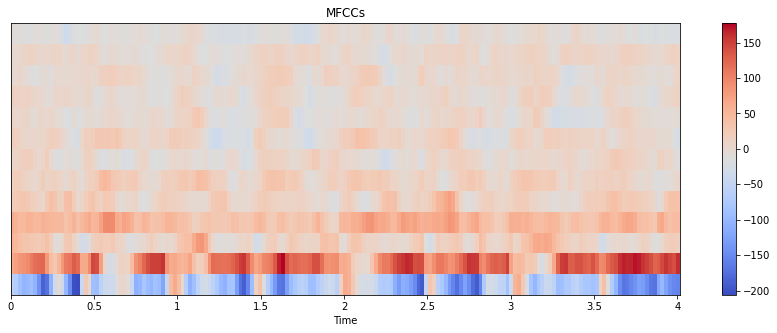

In [45]:
mfccs = librosa.feature.mfcc(y=y_f, sr=sr, n_mfcc=13)

plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')    